In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras import optimizers

In [227]:
path=r"C:\Users\Hard Parikh\Desktop\Stocks\GE.csv"
fixed_data=pd.read_csv(path)
data=pd.read_csv(path)
data.drop(columns=['Date','Adj Close'],inplace=True)
data.tail()

,Open,High,Low,Close,Volume
14699,6.79,6.94,6.79,6.80,129510700
14700,7.25,7.43,7.09,7.29,147750900
14701,7.49,7.49,6.74,6.78,138714800
14702,6.56,6.72,6.44,6.57,129404400
14703,6.58,6.82,6.49,6.76,75178700


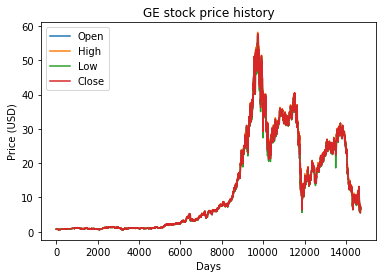

In [228]:
plt.figure()
plt.plot(data.Open)
plt.plot(data.High)
plt.plot(data.Low)
plt.plot(data.Close)
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'],loc='upper left')
plt.show()

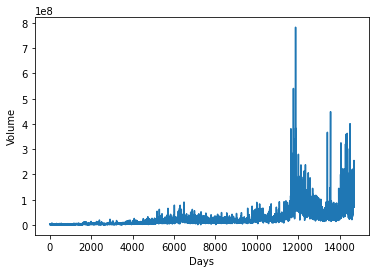

In [229]:
plt.plot(data.Volume)
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [230]:
train_data,test_data=train_test_split(data,test_size=0.2,shuffle=False)
train_price=list(train_data.Open)[60:]
test_price=list(test_data.Open)[60:]
fixed_train_data,fixed_test_data=train_test_split(fixed_data,test_size=0.2,shuffle=False)

In [39]:
train_scalar=MinMaxScaler()
train_data=train_scalar.fit_transform(train_data)

test_scalar=MinMaxScaler()
test_data=test_scalar.fit_transform(test_data)

In [220]:
X_train=[]
Y_train=[]
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i])
    Y_train.append(train_data[i])

In [221]:
X_test=[]
Y_test=[]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i])
    Y_test.append(test_data[i])

In [222]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [223]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11703, 60, 5)
(11703, 5)
(2881, 60, 5)
(2881, 5)


In [224]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(100, batch_input_shape=(32, 60, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,kernel_initializer='random_uniform'))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Dense(20,activation='relu'))
# lstm_model.add(Dense(1,activation='sigmoid'))
# optimizer = optimizers.RMSprop()
# lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [225]:
# lstm_model.fit(X_train[:11680],Y_train[:11680],epochs=50,batch_size=32,shuffle=False)

In [60]:
model=Sequential()
model.add(LSTM(60,activation='relu',return_sequences=True,input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(80,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [62]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=50,batch_size=32)

Epoch 1/50
11703/11703 [==============================] - 54s 5ms/step - loss: 0.0029 - accuracy: 2.5634e-04
Epoch 2/50
11703/11703 [==============================] - 54s 5ms/step - loss: 0.0010 - accuracy: 2.5634e-04
Epoch 3/50
11703/11703 [==============================] - 54s 5ms/step - loss: 9.6858e-04 - accuracy: 2.5634e-04
Epoch 4/50
11703/11703 [==============================] - 54s 5ms/step - loss: 8.8693e-04 - accuracy: 2.5634e-04
Epoch 5/50
11703/11703 [==============================] - 52s 4ms/step - loss: 8.2369e-04 - accuracy: 2.5634e-04
Epoch 6/50
11703/11703 [==============================] - 51s 4ms/step - loss: 7.4458e-04 - accuracy: 2.5634e-04
Epoch 7/50
11703/11703 [==============================] - 52s 4ms/step - loss: 7.2966e-04 - accuracy: 2.5634e-04
Epoch 8/50
11703/11703 [==============================] - 52s 4ms/step - loss: 7.1269e-04 - accuracy: 2.5634e-04
Epoch 9/50
11703/11703 [==============================] - 51s 4ms/step - loss: 6.4615e-04 - accuracy: 2.

In [63]:
model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
11703/11703 [==============================] - 38s 3ms/step - loss: 4.5429e-04 - accuracy: 2.5634e-04
Epoch 2/100
11703/11703 [==============================] - 35s 3ms/step - loss: 4.3975e-04 - accuracy: 2.5634e-04
Epoch 3/100
11703/11703 [==============================] - 35s 3ms/step - loss: 5.0733e-04 - accuracy: 2.5634e-04
Epoch 4/100
11703/11703 [==============================] - 35s 3ms/step - loss: 4.7459e-04 - accuracy: 2.5634e-04
Epoch 5/100
11703/11703 [==============================] - 35s 3ms/step - loss: 4.4385e-04 - accuracy: 2.5634e-04
Epoch 6/100
11703/11703 [==============================] - 36s 3ms/step - loss: 4.4782e-04 - accuracy: 2.5634e-04 1s - loss: 4.4842e-04 
Epoch 7/100
11703/11703 [==============================] - 36s 3ms/step - loss: 4.4638e-04 - accuracy: 2.5634e-04
Epoch 8/100
11703/11703 [==============================] - 35s 3ms/step - loss: 4.3548e-04 - accuracy: 2.5634e-04
Epoch 9/100
11703/11703 [==============================] - 36s 3m

In [234]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("gestocks.h5")

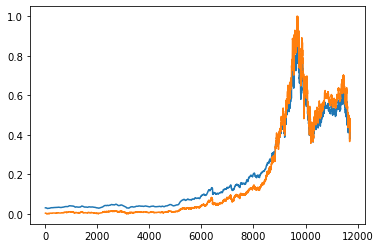

Error: 4.9268985


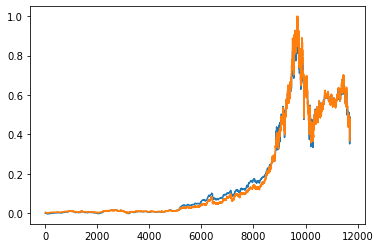

Error: 1.9521456


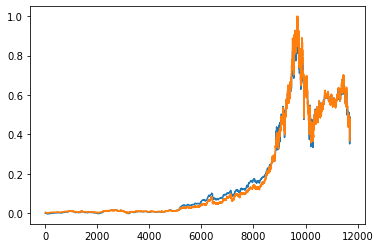

Error: 1.9521456


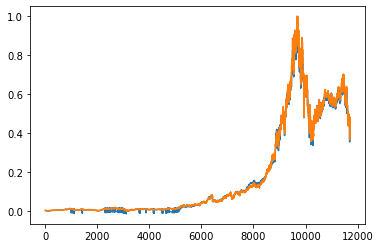

Error: 1.3872211


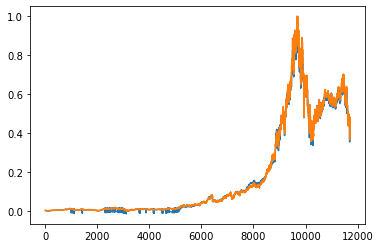

Error: 1.3872211


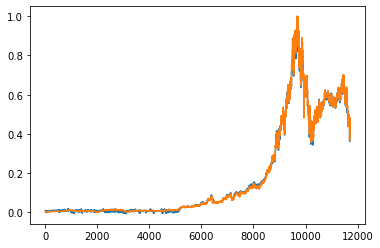

Error: 1.1248993


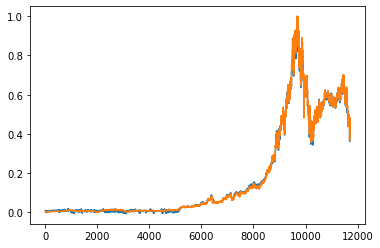

Error: 1.1248993


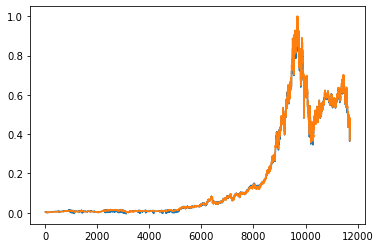

Error: 0.98956966


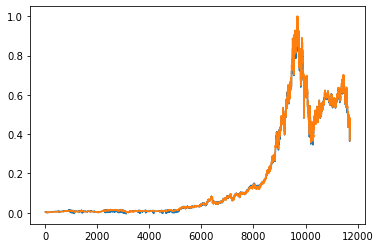

Error: 0.98956966


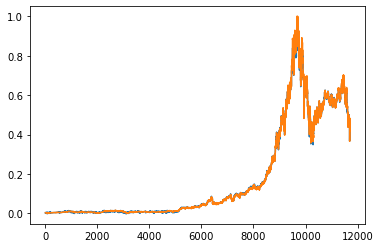

Error: 0.8646966


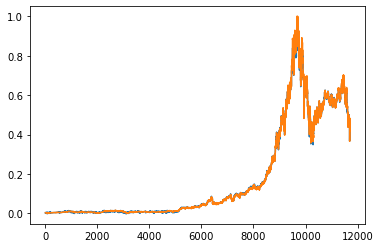

Error: 0.8646966


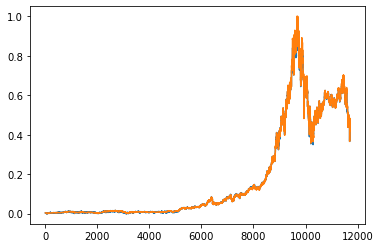

Error: 0.8263841


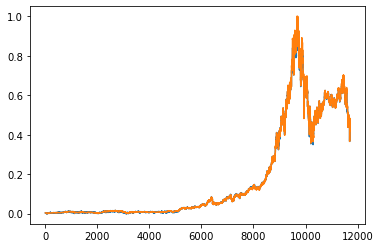

Error: 0.8263841


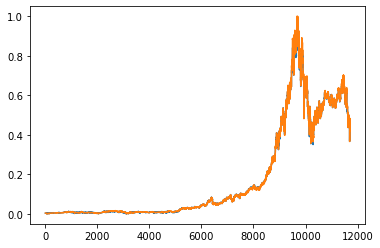

Error: 0.7945511


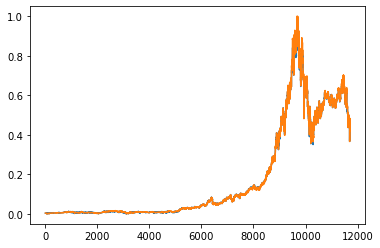

Error: 0.7945511


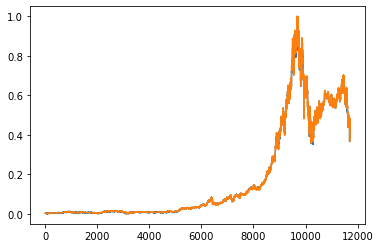

Error: 0.77986103


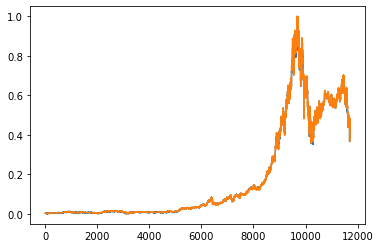

Error: 0.77986103


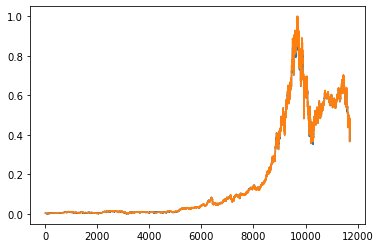

Error: 0.7665699


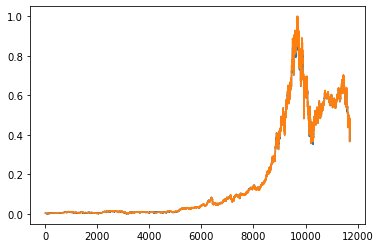

Error: 0.7665699


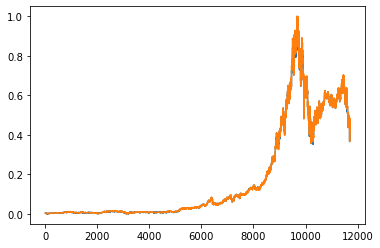

Error: 0.7613983


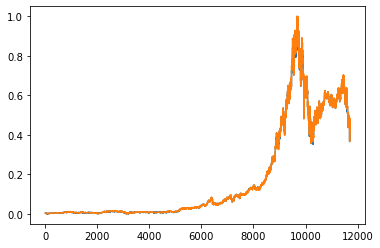

Error: 0.7613983


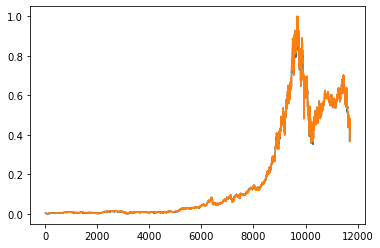

Error: 0.75611573


In [196]:
prediction=model.predict(X_train)
def find_error(x,y):
    e=0
    for i in range(len(x)):
        e=e+((x[i]-y[i])**2)
    error=e**(0.5)
    print("Error:",error[0])
    return error
error=np.inf
count=0
while(error>0.76):
    count=count+1
    plt.plot(prediction)
    plt.plot(Y_train)
    plt.show()
    error=find_error(prediction,Y_train)
    diff=[]
    diff_i=[]
    add=[]
    add_i=[]
    c=0
    tc=0
    for i in range(len(Y_train)):
        tc=tc+1
        temp=prediction[i][0]-Y_train[i]
        if(temp>=0):
            diff.append(temp)
            diff_i.append(i)
            c=c+1
        elif(temp<0):
            add.append(temp)
            add_i.append(i)
    dt=np.median(diff)
    ad=np.median(add)
    for i in range(len(prediction)):
        if(i in add_i):
            prediction[i][0]=prediction[i][0]+abs(ad)
        elif(i in diff_i):
            prediction[i][0]=prediction[i][0]-abs(dt)
    plt.plot(prediction)
    plt.plot(Y_train)
    plt.show()
    error=find_error(prediction,Y_train)

In [197]:
print(count)

11


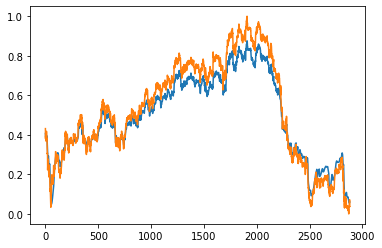

Error: 3.265249


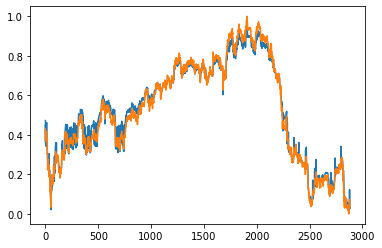

Error: 1.602642


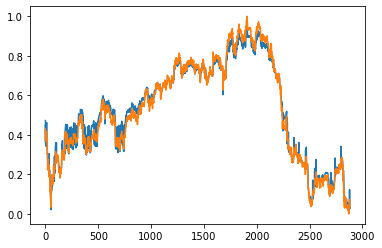

Error: 1.602642


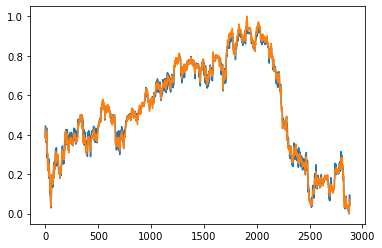

Error: 0.88419205


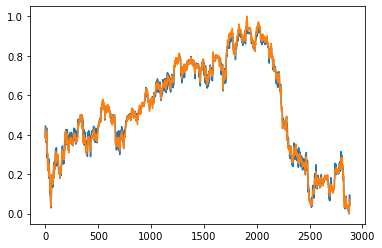

Error: 0.88419205


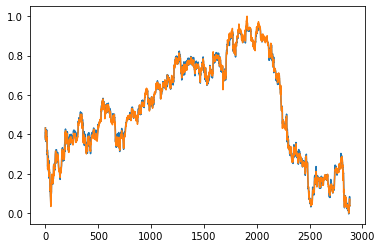

Error: 0.50898415


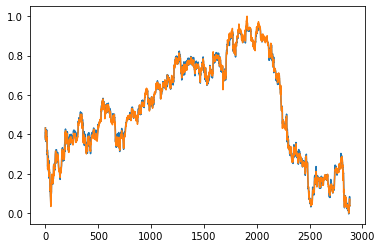

Error: 0.50898415


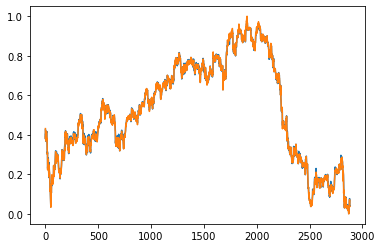

Error: 0.31829786


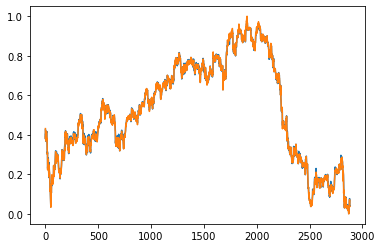

Error: 0.31829786


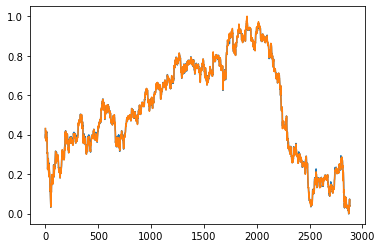

Error: 0.2262077


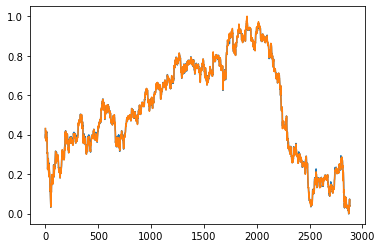

Error: 0.2262077


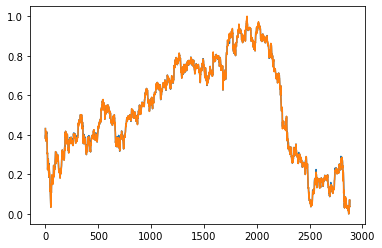

Error: 0.18565889


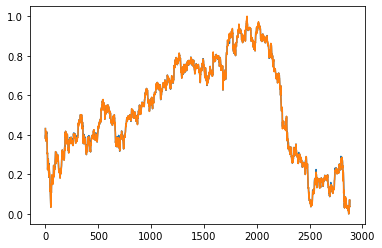

Error: 0.18565889


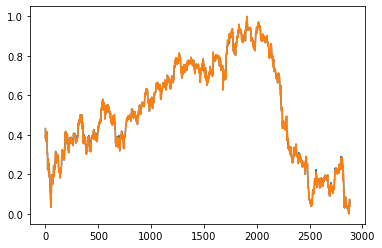

Error: 0.16718079


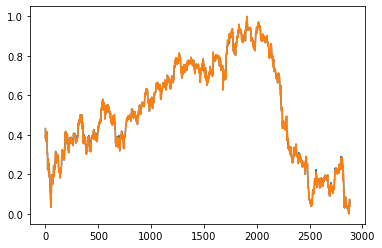

Error: 0.16718079


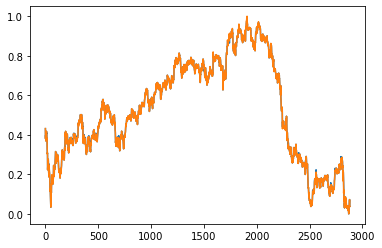

Error: 0.159577


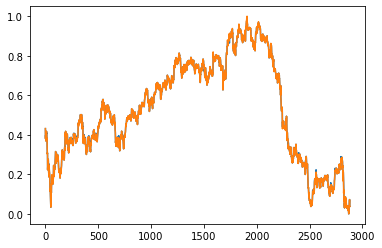

Error: 0.159577


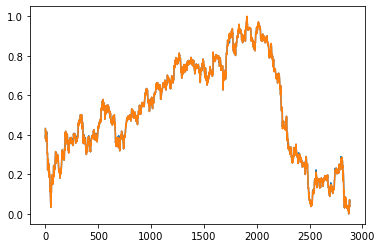

Error: 0.1557724


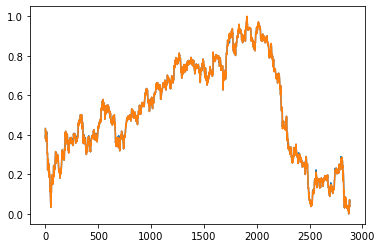

Error: 0.1557724


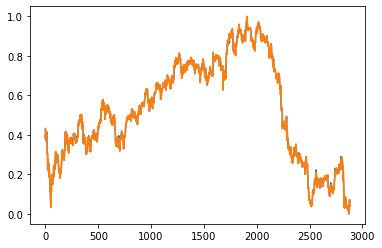

Error: 0.15400067


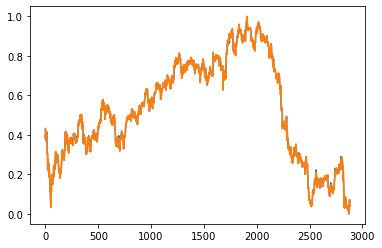

Error: 0.15400067


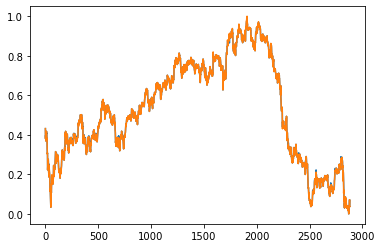

Error: 0.15312049


In [198]:
test_prediction=model.predict(X_test)
test_error=np.inf
test_count=0
while(test_count!=count):
    test_count=test_count+1
    plt.plot(test_prediction)
    plt.plot(Y_test)
    plt.show()
    test_error=find_error(test_prediction,Y_test)
    diff=[]
    diff_i=[]
    add=[]
    add_i=[]
    c=0
    tc=0
    for i in range(len(Y_test)):
        tc=tc+1
        temp=test_prediction[i][0]-Y_test[i]
        if(temp>=0):
            diff.append(temp)
            diff_i.append(i)
            c=c+1
        elif(temp<0):
            add.append(temp)
            add_i.append(i)
    dt=np.median(diff)
    ad=np.median(add)
    for i in range(len(test_prediction)):
        if(i in add_i):
            test_prediction[i][0]=test_prediction[i][0]+abs(ad)
        elif(i in diff_i):
            test_prediction[i][0]=test_prediction[i][0]-abs(dt)
    plt.plot(test_prediction)
    plt.plot(Y_test)
    plt.show()
    test_error=find_error(test_prediction,Y_test)

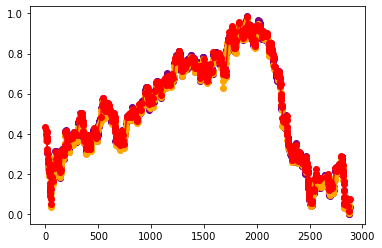

In [199]:
positive=[]
negative=[]
p_i=[]
n_i=[]
prediction=test_prediction
for i in range(len(prediction)-1):
    temp=prediction[i+1][0]-prediction[i][0]
    if(temp>=0):
        positive.append(temp)
        p_i.append(i)
    elif(temp<0):
        negative.append(temp)
        n_i.append(i)
positive_thres=np.mean(positive)
negative_thres=abs(np.mean(negative))
buy=[]
buy_i=[]
sell=[]
sell_i=[]
keep=[]
keep_i=[]
game=[]
for i in range(len(prediction)-1):
    temp=prediction[i+1][0]-prediction[i][0]
    if(temp>positive_thres or abs(temp)>negative_thres):
        if(temp>=0):
            if(temp>positive_thres):
                buy.append(prediction[i][0])
                buy_i.append(i)
                game.append([i,'BUY'])
        elif(temp<0):
            if(abs(temp)>negative_thres):
                sell.append(prediction[i][0])
                sell_i.append(i)
                game.append([i,'SELL'])
    else:
        keep.append(prediction[i][0])
        keep_i.append(i)
        game.append([i,'KEEP'])
bsk=[]
for i in range(len(prediction)):
    if(i in keep_i):
        bsk.append([prediction[i][0],'keep'])
    elif(i in sell_i):
        bsk.append([prediction[i][0],'sell'])
    elif(i in buy_i):
        bsk.append([prediction[i][0],'buy'])
plt.plot(prediction)
plt.plot(keep_i,keep,'purple',marker='o')
plt.plot(buy_i,buy,'orange',marker='o')
plt.plot(sell_i,sell,'red',marker='o')
plt.show()

In [200]:
sell_i[-10:]

[2831, 2838, 2839, 2843, 2845, 2847, 2848, 2860, 2868, 2878]

In [201]:
buy_i[-10:]

[2812, 2816, 2830, 2833, 2837, 2842, 2844, 2871, 2875, 2876]

In [202]:
keep_i[-10:]

[2865, 2866, 2867, 2869, 2870, 2872, 2873, 2874, 2877, 2879]

In [203]:
prices=test_price
start=len(prices)-30
prices=prices[start:]

In [204]:
BUDGET=int(round(np.mean(prices)*100))
initial=int(round(np.mean(prices)*100))
no_of_shares=0
advices=[]
i=start
day=1
end=0
while(end!=1 and BUDGET>0 and i<=(len(prices)-1+start)):
    print("DAY:-",day)
    print()
    print("The price of GE is:-",prices[i-start])
    print()
    if(i in sell_i):
        print("Advice:-SELL")
        advices.append("SELL")
        print()
    elif(i in buy_i):
        print("Advice:-BUY")
        advices.append("BUY")
        print()
    elif(i in keep_i):
        print("Advice:-KEEP")
        advices.append("KEEP")
        print()
    print("Your budget is:-",BUDGET)
    print("No of shares you have:-",no_of_shares)
    option=int(input("What do you wanna do?\n1.BUY\n2.SELL\n3.KEEP\n4.END\n"))
    if(option==3):
        print("Your budget is:-",BUDGET)
        print("No of shares you have:-",no_of_shares)
    elif(option==1):
        no_of_shares_new=int(input("How many shares you want to buy:-"))
        cost=no_of_shares_new*prices[i-start]
        if(cost<=BUDGET):
            print("The total cost is:-",cost)
            BUDGET=BUDGET-cost
            print("Your budget is:-",BUDGET)
            no_of_shares=no_of_shares+no_of_shares_new
            print("No of shares you have:-",no_of_shares)
        else:
            print("You do not have enough cash")
    elif(option==2):
        sell_no=int(input("How many shares you want to sell?"))
        if(sell_no<=no_of_shares):
            gain=sell_no*prices[i-start]
            print("You earned:-",gain)
            BUDGET=BUDGET+gain
            print("Your budget is:-",BUDGET)
            no_of_shares=no_of_shares-sell_no
            print("No of shares you have:-",no_of_shares)
        else:
            print("You do not have that much shares")
    elif(option==4):
        end=1
    i=i+1
    day=day+1
    print()
profit=BUDGET-initial
if(profit>=0):
    print("You made a profit of:-",profit)
else:
    print("You made a loss of:-",profit)

DAY:- 1

The price of GE is:- 6.61

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 2

The price of GE is:- 6.39

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 3

The price of GE is:- 6.59

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 4

The price of GE is:- 6.46

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 5

The price of GE is:- 6.59

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 6

The price of GE 

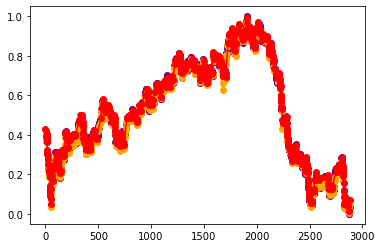

In [205]:
rpositive=[]
rnegative=[]
rp_i=[]
rn_i=[]
rprediction=Y_test
for i in range(len(rprediction)-1):
    rtemp=rprediction[i+1]-rprediction[i]
    if(rtemp>=0):
        rpositive.append(rtemp)
        rp_i.append(i)
    elif(rtemp<0):
        rnegative.append(rtemp)
        rn_i.append(i)
rpositive_thres=np.mean(rpositive)
rnegative_thres=abs(np.mean(rnegative))
rbuy=[]
rbuy_i=[]
rsell=[]
rsell_i=[]
rkeep=[]
rkeep_i=[]
rgame=[]
for i in range(len(rprediction)-1):
    rtemp=rprediction[i+1]-rprediction[i]
    if(rtemp>rpositive_thres or abs(rtemp)>rnegative_thres):
        if(rtemp>=0):
            if(rtemp>rpositive_thres):
                rbuy.append(rprediction[i])
                rbuy_i.append(i)
                rgame.append([i,'BUY'])
        elif(rtemp<0):
            if(abs(rtemp)>rnegative_thres):
                rsell.append(rprediction[i])
                rsell_i.append(i)
                rgame.append([i,'SELL'])
    else:
        rkeep.append(rprediction[i])
        rkeep_i.append(i)
        rgame.append([i,'KEEP'])
rbsk=[]
for i in range(len(rprediction)):
    if(i in rkeep_i):
        rbsk.append([rprediction[i],'keep'])
    elif(i in rsell_i):
        rbsk.append([rprediction[i],'sell'])
    elif(i in rbuy_i):
        rbsk.append([rprediction[i],'buy'])
plt.plot(rprediction)
plt.plot(rkeep_i,rkeep,'purple',marker='o')
plt.plot(rbuy_i,rbuy,'orange',marker='o')
plt.plot(rsell_i,rsell,'red',marker='o')
plt.show()

In [206]:


BUDGET=int(round(np.mean(prices)*100))
initial=int(round(np.mean(prices)*100))
no_of_shares=0
i=start
radvices=[]
day=1
end=0
while(end!=1 and BUDGET>0 and i<=(len(prices)-1+start)):
    print("DAY:-",day)
    print()
    print("The price of GE is:-",prices[i-start])
    print()
    if(i in rsell_i):
        print("Advice:-SELL")
        radvices.append("SELL")
        print()
    elif(i in rbuy_i):
        print("Advice:-BUY")
        radvices.append("BUY")
        print()
    elif(i in rkeep_i):
        print("Advice:-KEEP")
        radvices.append("KEEP")
        print()
    print("Your budget is:-",BUDGET)
    print("No of shares you have:-",no_of_shares)
    option=int(input("What do you wanna do?\n1.BUY\n2.SELL\n3.KEEP\n4.END\n"))
    if(option==3):
        print("Your budget is:-",BUDGET)
        print("No of shares you have:-",no_of_shares)
    elif(option==1):
        no_of_shares_new=int(input("How many shares you want to buy:-"))
        cost=no_of_shares_new*prices[i-start]
        if(cost<=BUDGET):
            print("The total cost is:-",cost)
            BUDGET=BUDGET-cost
            print("Your budget is:-",BUDGET)
            no_of_shares=no_of_shares+no_of_shares_new
            print("No of shares you have:-",no_of_shares)
        else:
            print("You do not have enough cash")
    elif(option==2):
        sell_no=int(input("How many shares you want to sell?"))
        if(sell_no<=no_of_shares):
            gain=sell_no*prices[i-start]
            print("You earned:-",gain)
            BUDGET=BUDGET+gain
            print("Your budget is:-",BUDGET)
            no_of_shares=no_of_shares-sell_no
            print("No of shares you have:-",no_of_shares)
        else:
            print("You do not have that much shares")
    elif(option==4):
        end=1
    i=i+1
    day=day+1
    print()
profit=BUDGET-initial
if(profit>=0):
    print("You made a profit of:-",profit)
else:
    print("You made a loss of:-",profit)

DAY:- 1

The price of GE is:- 6.61

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 2

The price of GE is:- 6.39

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 3

The price of GE is:- 6.59

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 4

The price of GE is:- 6.46

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 5

The price of GE is:- 6.59

Advice:-KEEP

Your budget is:- 641
No of shares you have:- 0
What do you wanna do?
1.BUY
2.SELL
3.KEEP
4.END
3
Your budget is:- 641
No of shares you have:- 0

DAY:- 6

The price of GE 

In [207]:
true_count=0
total_count=0
for i in range(len(advices)):
    total_count=total_count+1
    if(advices[i]==radvices[i]):
        true_count=true_count+1

In [208]:
(true_count/total_count)*100

96.55172413793103

In [211]:
prediction

array([[0.4315599 ],
       [0.3806241 ],
       [0.3987663 ],
       ...,
       [0.07204145],
       [0.03645832],
       [0.0371347 ]], dtype=float32)

In [219]:
test=X_test[-1].reshape(60,5)
test

array([[0.19131742, 0.19447067, 0.17191799, 0.17536847, 0.12270285],
       [0.15834488, 0.15726425, 0.14230348, 0.14938796, 0.17518509],
       [0.10428525, 0.1150714 , 0.10115085, 0.10392206, 0.14130793],
       [0.12153832, 0.12235926, 0.10307387, 0.12837431, 0.11081163],
       [0.1154039 , 0.1150714 , 0.10307387, 0.10392206, 0.11661354],
       [0.06211107, 0.08131712, 0.05192154, 0.06647955, 0.18682193],
       [0.08396496, 0.09128998, 0.06576728, 0.09016767, 0.12537711],
       [0.05290943, 0.05715213, 0.04499867, 0.04470177, 0.13287205],
       [0.04984221, 0.06405641, 0.03153753, 0.06074856, 0.1384812 ],
       [0.03450615, 0.04372713, 0.01615337, 0.04240937, 0.16278928],
       [0.03028873, 0.04794642, 0.02576847, 0.03782457, 0.11088286],
       [0.05367623, 0.05331642, 0.03730659, 0.03935284, 0.14615369],
       [0.03220574, 0.03720642, 0.02115322, 0.02368812, 0.11951034],
       [0.04025717, 0.05369999, 0.0380758 , 0.05807409, 0.13752946],
       [0.0705459 , 0.08975569, 0.